<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.00

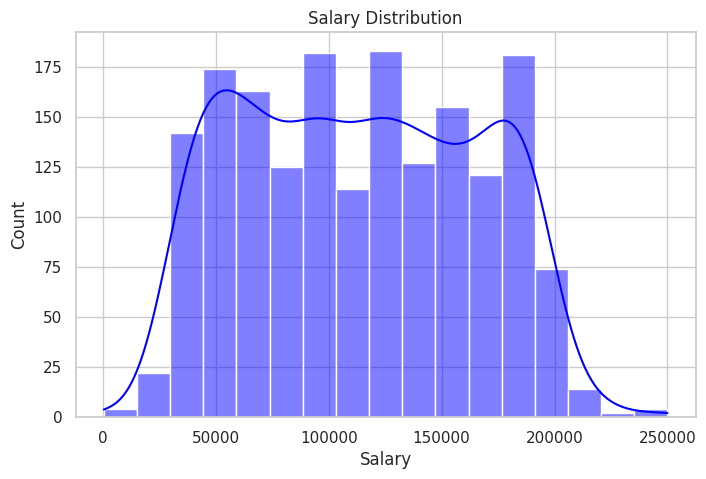

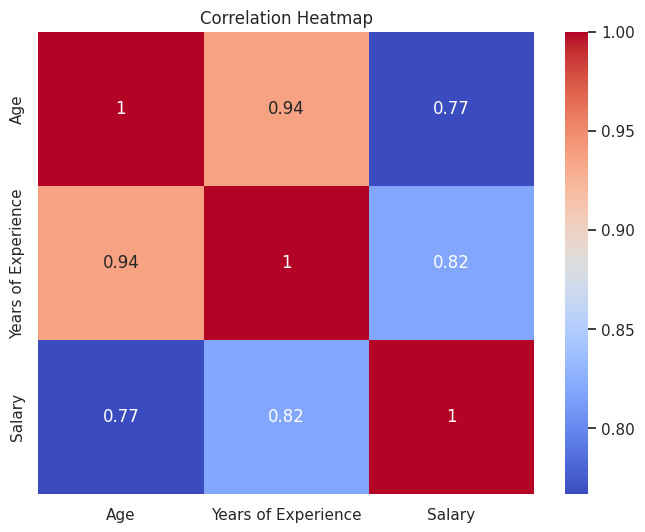

/tmp/ipython-input-1742651311.py:72: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Years of Experience", y="Salary", data=df, palette="Set2")


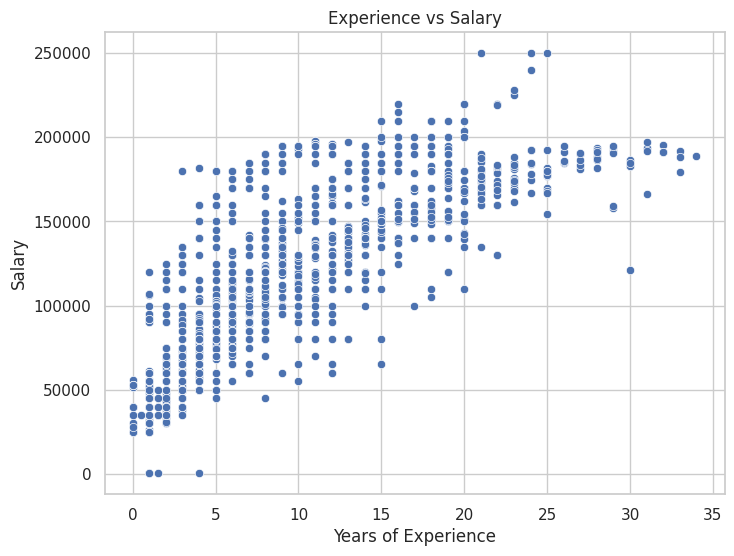

/tmp/ipython-input-1742651311.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Salary", data=df, palette="pastel")


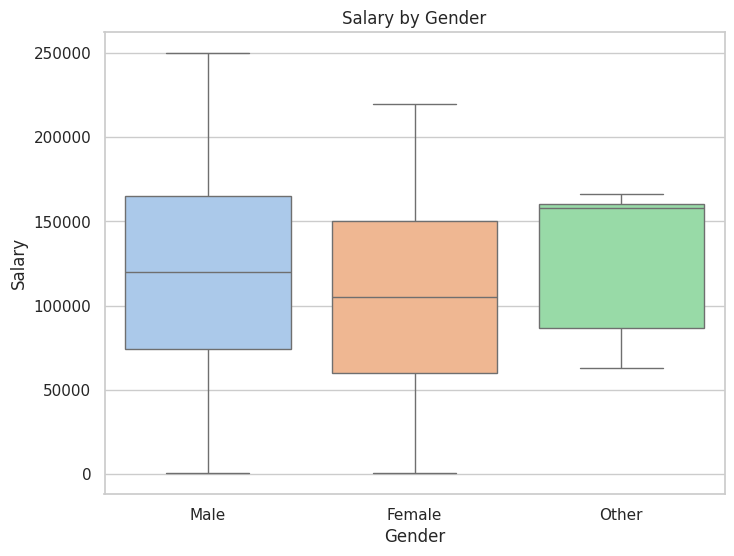

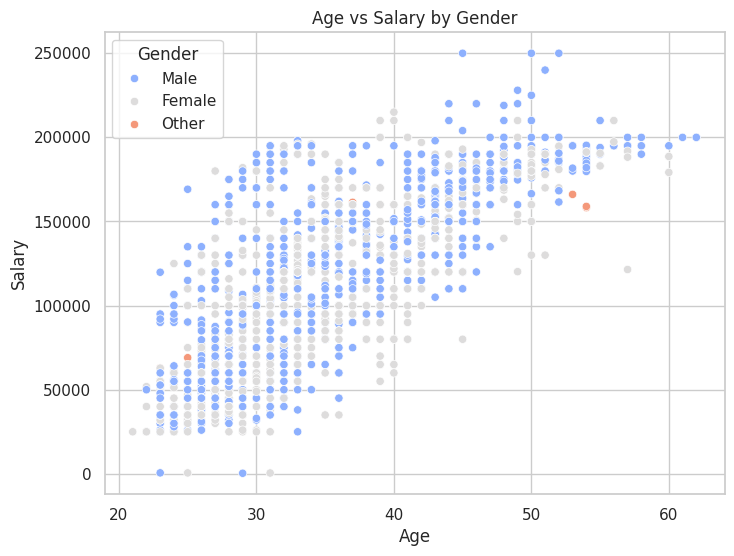

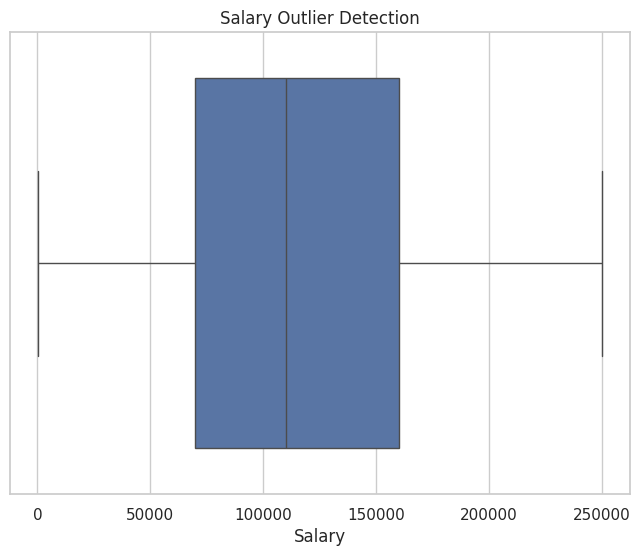

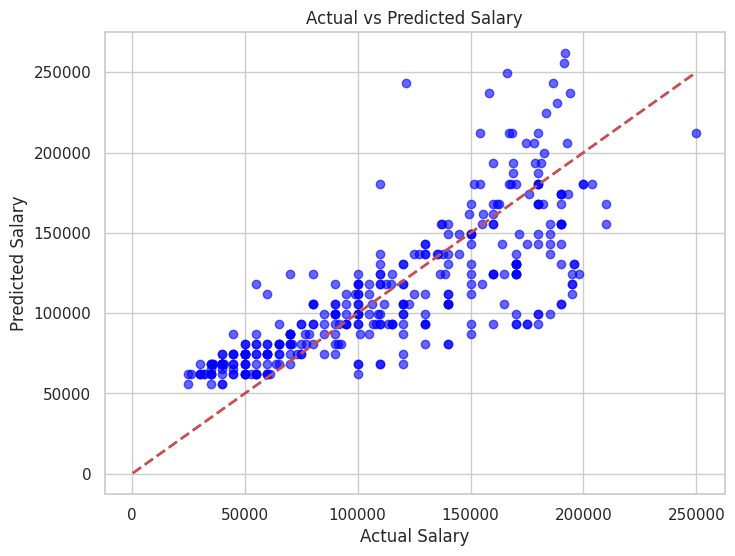

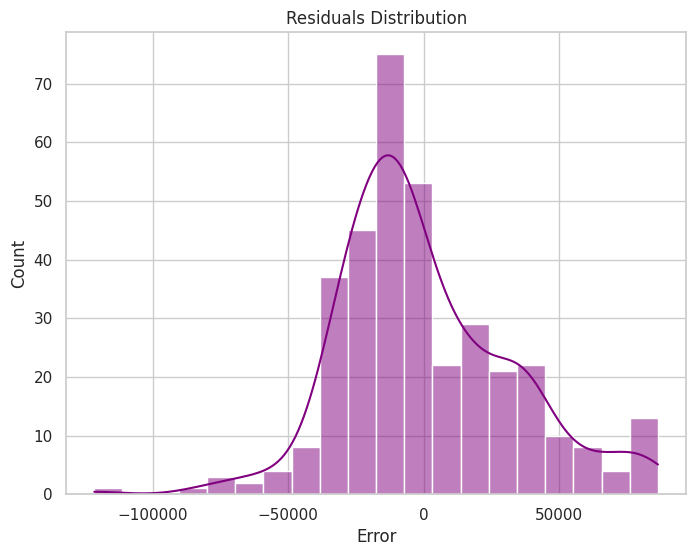

Mean Squared Error: 1029193114.6955096
Mean Absolute Error: 24878.548430003757
R2 Score: 0.6243738916439698


In [15]:
# =====================================
# Salary Prediction using Years of Experience
# =====================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For better plots in Colab
%matplotlib inline
sns.set(style="whitegrid")

# 2. Load Dataset
df = pd.read_csv('/content/Salary_Data_01.csv', encoding='latin-1')

# Remove BOM (Byte Order Mark) if present
df.columns = df.columns.str.replace('ï»¿','', regex=True)
df.columns = df.columns.str.strip()

# Quick overview
print(df.info())
print(df.describe())
print(df.head())

# 3. Data Cleaning
# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Drop rows with nulls
df = df.dropna()

# Convert 'Salary' and 'Years of Experience' to numeric, coercing errors
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')


# Drop rows with nulls introduced by coercion
df = df.dropna()

# Check again
print("\nAfter Cleaning and Type Conversion:\n", df.isnull().sum())
print(df.info())


# 4. EDA - Visualizations

# Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], kde=True, color="blue")
plt.title("Salary Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter: Experience vs Salary
if "Years of Experience" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="Years of Experience", y="Salary", data=df, palette="Set2")
    plt.title("Experience vs Salary")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.show()

# Boxplot: Salary by Gender
if "Gender" in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x="Gender", y="Salary", data=df, palette="pastel")
    plt.title("Salary by Gender")
    plt.show()

# Scatter: Age vs Salary
if "Age" in df.columns and "Gender" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="Age", y="Salary", hue="Gender", data=df, palette="coolwarm")
    plt.title("Age vs Salary by Gender")
    plt.show()

# 5. Outlier Detection and Removal
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Salary'])
plt.title("Salary Outlier Detection")
plt.show()

# Z-score method
z = np.abs(stats.zscore(df['Salary']))
df = df[z < 3]

# Drop nulls again if any
df = df.dropna()

# 6. Train-Test Split
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ["Gender", "Education Level", "Job Title"]

# Fill missing values and encode - these columns are not in the current data
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')  # Replace missing values
        df[col] = LabelEncoder().fit_transform(df[col])  # Encode categories

# Features and target - explicitly use 'Years of Experience' as the feature
X = df[['Years of Experience']]
y = df["Salary"]

# Drop any remaining NaNs from features and target
X = X.dropna()
y = y.dropna()

# Ensure X and y have the same index after dropping NaNs
y = y[X.index]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.show()

# 8. Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)